<a href="https://colab.research.google.com/github/rovcosta/mediaMovel_covid_MT/blob/main/media_movel_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
# import geopandas as gpd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
%matplotlib inline
# sns.set() #para os gráficos virem configurados por padrão pelo seaborn

In [ ]:
import requests

In [ ]:
def load_data():
    file_path = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"
    r = requests.get(file_path)
    with open("caso_full.gz",'wb') as f:
        f.write(r.content)
    # IMPORTA ARQUIVO E DESCOMPRIME O ZIP
    df = pd.read_csv('caso_full.gz', compression='gzip', header=0, sep=',', quotechar='"')
    df['date'] = pd.to_datetime(df['date'])
    df['last_available_date'] = pd.to_datetime(df['last_available_date'])
    df = df[['date','last_available_confirmed','last_available_deaths']]
    return df

data = load_data()
data

,date,last_available_confirmed,last_available_deaths
0,2020-03-17,3,0
1,2020-03-17,3,0
2,2020-03-18,3,0
3,2020-03-18,3,0
4,2020-03-19,4,0
...,...,...,...
3044939,2021-11-03,208,2
3044940,2021-11-03,197,3
3044941,2021-11-03,1155,18
3044942,2021-11-03,2410,33


In [ ]:
# FAZ DOWNLOAD DO ARQUIVO ZIP E SALVA NA PASTA
import requests
file_path = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"
r = requests.get(file_path)
with open("/content/drive/MyDrive/VisualDadosMT/COVID/caso_full.gz",'wb') as f:
  f.write(r.content)

In [ ]:
# IMPORTA ARQUIVO E DESCOMPRIME O ZIP
base = pd.read_csv('/content/drive/MyDrive/VisualDadosMT/COVID/caso_full.gz', compression='gzip', header=0, sep=',', quotechar='"')
df = pd.DataFrame(base) 
df['date'] = pd.to_datetime(df['date'])
df['last_available_date'] = pd.to_datetime(df['last_available_date'])
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [ ]:
## ##EXTRATO
uf = 'MT'
##Data da última atualização
last_date  = df.loc[(df['state']==uf)&(df['place_type']=='city')]['last_available_date'].max()
## Total Casos confirmados
tconf  = df.loc[(df['state']==uf)&(df['place_type']=='state')]['last_available_confirmed'].max()
## Total Mortes
tmort  = df.loc[(df['state']==uf)&(df['place_type']=='state')]['last_available_deaths'].max()
## Confirmados por 100k hab
khab  = df.loc[(df['state']==uf)&(df['place_type']=='state')]['last_available_confirmed_per_100k_inhabitants'].max()
#taxa de mortalidade MT
txMort = (tmort/tconf)*100
##Casos confirmados do dia
dia_conf  = df.loc[(df['state']==uf)&(df['place_type']=='state')&(df['is_last']==True)]['new_confirmed'].max()
##MOrtes confirmadas do dia
dia_mort  = df.loc[(df['state']==uf)&(df['place_type']=='state')&(df['is_last']==True)]['new_deaths'].max()
print(' # EXTRATO DE DADOS COVID19 - MT #')
print('='*35)
print('| Útima atualização:{}/{}/{}'.format(last_date.day,last_date.month,last_date.year))
print('='*35)
print('| Estado: {}'.format(uf))
print('| Casos confirmados: {:,d}'.format(tconf))
# print('| Confirmados por 100k hab      |{:.0f}/100k  |'.format(khab))
print('| Mortes confirmadas: {:,d}'.format(tmort))
print('| Taxa de Mortalidade: {:.2f} %'.format(txMort))
print('-'*35)
print('| Casos confirmados neste dia: {:,d}'.format(dia_conf))
print('| Mortes confirmadas neste dia: {:,d}'.format(dia_mort))
print()

 # EXTRATO DE DADOS COVID19 - MT #
| Útima atualização:2/11/2021
| Estado: MT
| Casos confirmados: 547,446
| Mortes confirmadas: 13,941
| Taxa de Mortalidade: 2.55 %
-----------------------------------
| Casos confirmados neste dia: 359
| Mortes confirmadas neste dia: 6



# CRIAR MÉDIA MÓVEL DE CASOS

In [ ]:
mt = df.loc[(df['state']== 'MT')&(df['place_type']=='state')]\
  .groupby(['date'])\
  [['new_confirmed','new_deaths']].max()\
  .sort_values(by='date',ascending=False).reset_index()
mt.set_index('date', inplace=True)
mt.head()

,new_confirmed,new_deaths
date,,
2021-11-03,359,6
2021-11-02,35,2
2021-11-01,55,3
2021-10-31,27,1
2021-10-30,79,1


In [ ]:
test = df.loc[(df['state']== 'MT')&(df['place_type']=='state')&(df['date']>='2021-01-01')]\
  .groupby(['date'])[['new_confirmed','new_deaths']].max().reset_index()
print('    Descritiva dos dados de 2021')
print('-'*33)
test.describe()

    Descritiva dos dados de 2021
---------------------------------


,new_confirmed,new_deaths
count,307.000000,307.000000
mean,1195.423453,30.687296
std,723.547874,23.809702
min,27.000000,1.000000
25%,564.500000,14.000000
50%,1173.000000,26.000000
75%,1718.000000,40.000000
max,3417.000000,128.000000


In [ ]:
##### INVERTENDO A ORDEM DO INICIO DAS DATAS PARA CRIAR AS MÉDIAS MÓVEIS COMEÇANDO CORRETAMENTE, DO INÍCIO DA PANDEMIA E NÃO DAS ULTIMAS DATAS
### SE NÃO INVERTER, AS MÉDIAS DOS ULTIMOS DIAS NÃO SERÁ CALCULADA
mt.sort_values(by='date', ascending=True, inplace=True)
mt.head()

,new_confirmed,new_deaths
date,,
2020-03-20,1,0
2020-03-21,0,0
2020-03-22,1,0
2020-03-23,4,0
2020-03-24,1,0


In [ ]:
# MÉDIA MÓVEL: média de casos ou mortes dos últimos 7 dias
mt['Media_Movel_Casos'] = mt.new_confirmed.rolling(window=7).mean()
mt['Media_Movel_Mortes'] = mt.new_deaths.rolling(window=7).mean()

# VARIAÇÃO: mudança da média móvel nos últimos 14 dias
mt['Variacao_mcasos'] = mt.Media_Movel_Casos.pct_change(14)
mt['Variacao_mmortes'] = mt.Media_Movel_Casos.pct_change(14)
### Estabilidade: variações de até 15%, para mais ou para menos
# < 0 = Baixa | 0 - 15% = estabilidade| > 15% = Alta


In [ ]:
mt.tail()

,new_confirmed,new_deaths,Media_Movel_Casos,Media_Movel_Mortes,Variacao_mcasos,Variacao_mmortes
date,,,,,,
2021-10-30,79,1,271.571429,2.857143,-0.077632,-0.077632
2021-10-31,27,1,271.285714,2.857143,-0.078155,-0.078155
2021-11-01,55,3,218.000000,2.571429,-0.342808,-0.342808
2021-11-02,35,2,155.285714,1.857143,-0.597258,-0.597258
2021-11-03,359,6,152.857143,2.571429,-0.599850,-0.599850


In [ ]:
from datetime import datetime
now = datetime.now()
dir = '/content/drive/MyDrive/VisualDadosMT/COVID'
mt.to_csv(f"{dir}/MediaMovel_{now}.csv")

In [ ]:
atual = mt.index.max()

In [ ]:
### CASOS ==============
mtCasos = mt
mtCasos.rename({'new_confirmed':'Novos Casos','Media_Movel_Casos':'Média Móvel Casos'}, axis=1,inplace=True)

<bound method Figure.show of <Figure size 864x360 with 1 Axes>>

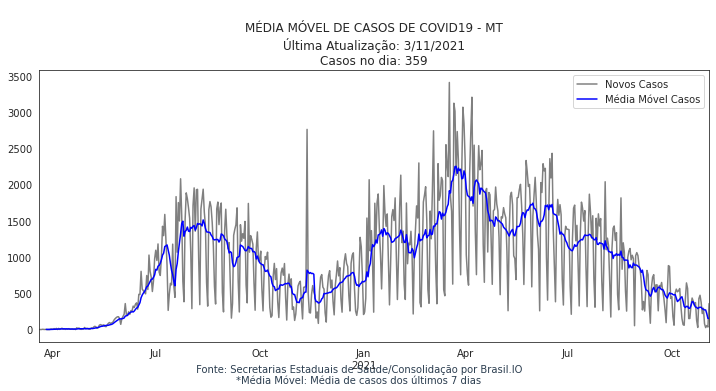

In [ ]:
sns.set_style('white')
fig1, ax = plt.subplots(1, figsize=(15,2))
mtCasos[['Novos Casos','Média Móvel Casos']].plot(
    figsize=(12,5), 
    color=['grey','blue'], 
    title=f"\nMÉDIA MÓVEL DE CASOS DE COVID19 - MT\nÚltima Atualização: {atual.day}/{atual.month}/{atual.year}\nCasos no dia: {dia_conf}",
    ax = ax    
    )

plt.xlabel(None)
ax.annotate(' Fonte: Secretarias Estaduais de Saúde/Consolidação por Brasil.IO\n*Média Móvel: Média de casos dos últimos 7 dias', xy=(0.5,.07),xycoords='figure fraction',horizontalalignment='center',verticalalignment='top',fontsize=10,color='#2C3E50')
fig1.show

In [ ]:
img_dir = '/content/drive/MyDrive/VisualDadosMT/COVID'
fig1.savefig(f"{img_dir}/Média_Móvel_Casos.png", bbox_inches='tight',dpi=300)

In [ ]:
#### MORTES ==============
mtMortes = mt
mtMortes.rename({'new_deaths':'Novas Mortes','Media_Movel_Mortes':'Média Móvel Mortes'}, axis=1,inplace=True)

In [ ]:
# define colors
GRAY1, GRAY2, GRAY3, GRAY4, GRAY5, GRAY6, GRAY7, GRAY8, GRAY9 = '#231F20', '#414040', '#555655','#646369', '#76787B', '#828282','#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2, RED3, RED4= '#800000','#C3514E', '#E6BAB7',' #ff8080'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.bf'] = 'Arial:bold'
mpl.rcParams['mathtext.it'] = 'Arial:italic'

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1311: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



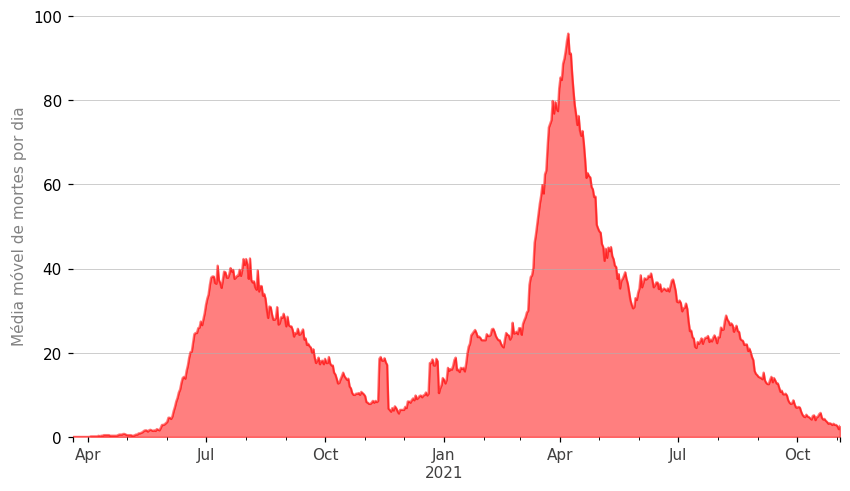

In [ ]:
mpl.style.use('default')

#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(9, 5),dpi=110)
# plt.subplots_adjust(left=0, right=0.73, top=0.665, bottom=0.17)

mtMortes.plot.area(y='Média Móvel Mortes',ax=ax, legend=False, color='R', alpha=.5)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(10)
    item.set_color(GRAY2)

plt.grid(axis = 'y', linewidth=0.4)

# ax.legend(loc='upper left',fontsize=12, frameon=False)
# plt.yticks([])                            
# plt.xticks(rotation='45')
plt.xlabel(None)
plt.ylabel('Média móvel de mortes por dia', color=GRAY6)



# ax.set_facecolor('None')


fig.show()


In [ ]:
img_dir = '/content/drive/MyDrive/VisualDadosMT/COVID'
fig.savefig(f"{img_dir}/Post_Média_Móvel_Mortes.png", bbox_inches='tight',dpi=300, transparent=True)

In [ ]:
mtMortes.tail()

,Novos Casos,Novas Mortes,Média Móvel Casos,Média Móvel Mortes,Variacao_mcasos,Variacao_mmortes
date,,,,,,
2021-10-08,567,9,418.000000,5.285714,-0.205970,-0.205970
2021-10-09,335,1,440.285714,4.857143,-0.078625,-0.078625
2021-10-10,154,2,453.714286,4.714286,-0.001572,-0.001572
2021-10-11,68,4,391.571429,4.428571,-0.099244,-0.099244
2021-10-12,59,4,320.142857,4.142857,-0.328439,-0.328439


<bound method Figure.show of <Figure size 1200x500 with 1 Axes>>

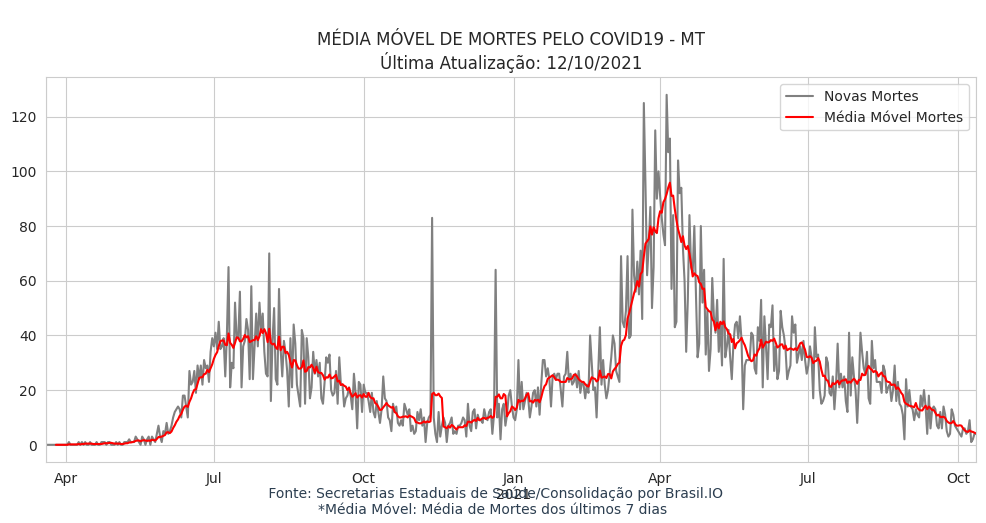

In [ ]:
sns.set_style('whitegrid')
fig2, ax = plt.subplots(1, figsize=(15,2))
mtMortes[['Novas Mortes','Média Móvel Mortes']].plot(
    figsize=(12,5), 
    color=['grey','red'], 
    title=f"\nMÉDIA MÓVEL DE MORTES PELO COVID19 - MT\nÚltima Atualização: {atual.day}/{atual.month}/{atual.year}",
    ax = ax    
    )
plt.xlabel(None)
ax.annotate(' Fonte: Secretarias Estaduais de Saúde/Consolidação por Brasil.IO\n*Média Móvel: Média de Mortes dos últimos 7 dias', xy=(0.5,.07),xycoords='figure fraction',horizontalalignment='center',verticalalignment='top',fontsize=10,color='#2C3E50')
fig2.show

In [ ]:
# img_dir = '/content/drive/MyDrive/VisualDadosMT/COVID'
fig2.savefig(f"{img_dir}/Média_Móvel_Mortes.png", bbox_inches='tight',dpi=300)

# RACE MAP ON FLOURISH

In [ ]:
# GRAFICO DE CORRIDA CSV - CASOS CONFIRMADOS
raceCasos = base.loc[(base['state']== 'MT')&(base['place_type']=='city')].copy()
raceCasos = raceCasos.groupby(['city','last_available_date'])['last_available_confirmed'].sum().unstack().reset_index()
raceCasos.fillna(value=0, inplace=True)
print(raceCasos.shape)
raceCasos.head()

(142, 463)


last_available_date,city,2020-03-20 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-10 00:00:00,2020-04-11 00:00:00,2020-04-12 00:00:00,2020-04-13 00:00:00,2020-04-14 00:00:00,2020-04-15 00:00:00,2020-04-16 00:00:00,2020-04-17 00:00:00,2020-04-18 00:00:00,2020-04-19 00:00:00,2020-04-20 00:00:00,2020-04-21 00:00:00,2020-04-22 00:00:00,2020-04-23 00:00:00,2020-04-24 00:00:00,2020-04-25 00:00:00,2020-04-26 00:00:00,2020-04-27 00:00:00,2020-04-28 00:00:00,2020-04-29 00:00:00,2020-04-30 00:00:00,2020-05-01 00:00:00,...,2021-09-02 00:00:00,2021-09-03 00:00:00,2021-09-04 00:00:00,2021-09-05 00:00:00,2021-09-06 00:00:00,2021-09-07 00:00:00,2021-09-08 00:00:00,2021-09-09 00:00:00,2021-09-10 00:00:00,2021-09-11 00:00:00,2021-09-12 00:00:00,2021-09-13 00:00:00,2021-09-14 00:00:00,2021-09-15 00:00:00,2021-09-16 00:00:00,2021-09-17 00:00:00,2021-09-18 00:00:00,2021-09-19 00:00:00,2021-09-20 00:00:00,2021-09-21 00:00:00,2021-09-22 00:00:00,2021-09-23 00:00:00,2021-09-24 00:00:00,2021-09-25 00:00:00,2021-09-26 00:00:00,2021-09-27 00:00:00,2021-09-28 00:00:00,2021-09-29 00:00:00,2021-09-30 00:00:00,2021-10-01 00:00:00,2021-10-02 00:00:00,2021-10-03 00:00:00,2021-10-04 00:00:00,2021-10-05 00:00:00,2021-10-06 00:00:00,2021-10-07 00:00:00,2021-10-08 00:00:00,2021-10-09 00:00:00,2021-10-10 00:00:00,2021-10-11 00:00:00
0,Acorizal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,743.0,745.0,746.0,746.0,755.0,756.0,759.0,760.0,769.0,770.0,770.0,770.0,776.0,778.0,785.0,785.0,785.0,785.0,785.0,785.0,789.0,789.0,790.0,790.0,790.0,796.0,796.0,799.0,799.0,799.0,800.0,800.0,801.0,802.0,802.0,802.0,803.0,804.0,804.0,1608.0
1,Alta Floresta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,10066.0,10069.0,10075.0,10075.0,10077.0,10078.0,10080.0,10085.0,10108.0,10121.0,10121.0,10124.0,10136.0,10146.0,10161.0,10168.0,10169.0,10170.0,10171.0,10197.0,10205.0,10214.0,10228.0,10240.0,10268.0,10271.0,10272.0,10296.0,10334.0,10358.0,10380.0,10382.0,10386.0,10391.0,10429.0,10436.0,10474.0,10504.0,10525.0,21054.0
2,Alto Araguaia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1585.0,1585.0,1585.0,1585.0,1585.0,1585.0,1585.0,1593.0,1593.0,1593.0,1593.0,1593.0,1593.0,1598.0,1598.0,1600.0,1600.0,1600.0,1601.0,1601.0,1602.0,1602.0,1602.0,1602.0,1602.0,1604.0,1605.0,1605.0,1605.0,1605.0,1605.0,1605.0,1606.0,1606.0,1607.0,1607.0,1607.0,1607.0,1607.0,3214.0
3,Alto Boa Vista,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,854.0,855.0,857.0,857.0,862.0,862.0,864.0,871.0,882.0,885.0,885.0,887.0,911.0,913.0,918.0,923.0,923.0,923.0,925.0,929.0,931.0,932.0,936.0,936.0,936.0,936.0,936.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,941.0,941.0,942.0,942.0,942.0,1886.0
4,Alto Garças,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1134.0,1134.0,1134.0,1134.0,1136.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,2314.0


In [ ]:
dir = '/content/drive/MyDrive/VisualDadosMT/COVID'
raceCasos.to_csv(f"{dir}/RaceCasos.csv", index=False)

In [ ]:
# GRAFICO DE CORRIDA CSV - MOERTES CONFIRMADAS
raceMortes = df.loc[(df['state']== 'MT')&(df['place_type']=='city')].copy()
raceMortes = raceMortes.groupby(['city','last_available_date'])['last_available_deaths'].sum().unstack().reset_index()
raceMortes.fillna(value=0, inplace=True)
print(raceMortes.shape)
raceMortes.head()

(142, 463)


last_available_date,city,2020-03-20 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-10 00:00:00,2020-04-11 00:00:00,2020-04-12 00:00:00,2020-04-13 00:00:00,2020-04-14 00:00:00,2020-04-15 00:00:00,2020-04-16 00:00:00,2020-04-17 00:00:00,2020-04-18 00:00:00,2020-04-19 00:00:00,2020-04-20 00:00:00,2020-04-21 00:00:00,2020-04-22 00:00:00,2020-04-23 00:00:00,2020-04-24 00:00:00,2020-04-25 00:00:00,2020-04-26 00:00:00,2020-04-27 00:00:00,2020-04-28 00:00:00,2020-04-29 00:00:00,2020-04-30 00:00:00,2020-05-01 00:00:00,...,2021-09-02 00:00:00,2021-09-03 00:00:00,2021-09-04 00:00:00,2021-09-05 00:00:00,2021-09-06 00:00:00,2021-09-07 00:00:00,2021-09-08 00:00:00,2021-09-09 00:00:00,2021-09-10 00:00:00,2021-09-11 00:00:00,2021-09-12 00:00:00,2021-09-13 00:00:00,2021-09-14 00:00:00,2021-09-15 00:00:00,2021-09-16 00:00:00,2021-09-17 00:00:00,2021-09-18 00:00:00,2021-09-19 00:00:00,2021-09-20 00:00:00,2021-09-21 00:00:00,2021-09-22 00:00:00,2021-09-23 00:00:00,2021-09-24 00:00:00,2021-09-25 00:00:00,2021-09-26 00:00:00,2021-09-27 00:00:00,2021-09-28 00:00:00,2021-09-29 00:00:00,2021-09-30 00:00:00,2021-10-01 00:00:00,2021-10-02 00:00:00,2021-10-03 00:00:00,2021-10-04 00:00:00,2021-10-05 00:00:00,2021-10-06 00:00:00,2021-10-07 00:00:00,2021-10-08 00:00:00,2021-10-09 00:00:00,2021-10-10 00:00:00,2021-10-11 00:00:00
0,Acorizal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,44.0
1,Alta Floresta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,144.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,294.0
2,Alto Araguaia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,58.0
3,Alto Boa Vista,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,36.0
4,Alto Garças,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,84.0


In [ ]:
dir = '/content/drive/MyDrive/VisualDadosMT/COVID'
raceMortes.to_csv(f"{dir}/RaceMortes.csv", index=False)

In [ ]:
# TESTAR MEDIA MOVEL POR MUNICIPIO
mm = df.loc[(df['state']== 'MT')&(df['place_type']=='city')]\
  .groupby(['city','last_available_date'])[['last_available_confirmed']].sum().unstack()
#   .sort_values(by='city',ascending=False).reset_index()
# mm.set_index('city', inplace=True)
mm.head()

last_available_confirmed             ...                      
last_available_date               2020-03-20 2020-03-23  ... 2021-10-10 2021-10-11
city                                                     ...                      
Acorizal                                 NaN        NaN  ...      804.0     1608.0
Alta Floresta                            NaN        NaN  ...    10525.0    21054.0
Alto Araguaia                            NaN        NaN  ...     1607.0     3214.0
Alto Boa Vista                           NaN        NaN  ...      942.0     1886.0
Alto Garças                              NaN        NaN  ...     1157.0     2314.0

[5 rows x 462 columns]

In [ ]:
###### TESTANDO COM PLOTLY
!pip install update plotly 
import plotly.express as px
import plotly

In [ ]:
pd.options.plotting.backend = 'plotly'


fig1, ax = plt.subplots(1, figsize=(15,2))
mtCasos[['Novos Casos','Média Móvel Casos']].plot(
    figsize=(12,5), 
    color=['grey','blue'], 
    title=f"\nMÉDIA MÓVEL DE CASOS DE COVID19 - MT\nÚltima Atualização: {atual.day}/{atual.month}/{atual.year}",
    ax = ax    
    )

plt.xlabel(None)
ax.annotate(' Fonte: Secretarias Estaduais de Saúde/Consolidação por Brasil.IO\n*Média Móvel: Média de casos dos últimos 7 dias', xy=(0.5,.07),xycoords='figure fraction',horizontalalignment='center',verticalalignment='top',fontsize=10,color='#2C3E50')
fig1.show

ValueError: ignored